# Linear Regression

In [2]:
library(UsingR)

In [3]:
data(diamond)

In [5]:
head(diamond)

carat,price
0.17,355
0.16,328
0.17,350
0.18,325
0.25,642
0.16,342


In [6]:
library(ggplot2)

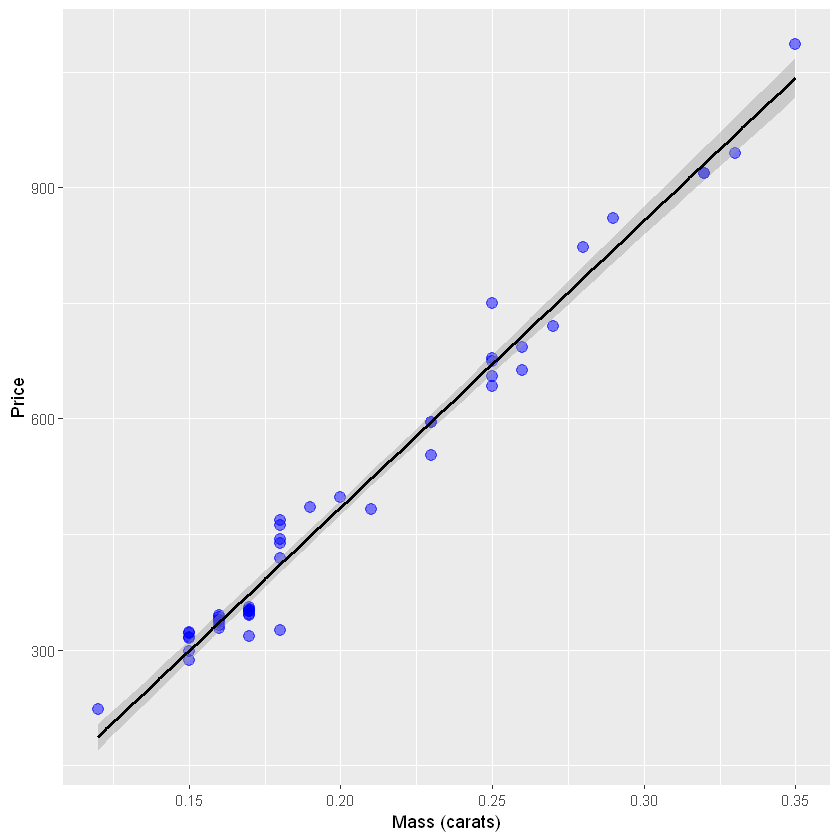

In [12]:
g = ggplot(diamond, aes(x = carat, y = price))
g = g + xlab("Mass (carats)")
g = g + ylab("Price")
g = g + geom_point(size = 3, color = 'blue', alpha = 0.5)
g = g + geom_smooth(method = "lm", color = "black")
g

In [30]:
fit <- lm(price ~ carat, data = diamond)
fit


Call:
lm(formula = price ~ carat, data = diamond)

Coefficients:
(Intercept)        carat  
     -259.6       3721.0  


In [31]:
coef(fit)[1]

(Intercept) 
  -259.6259

In [32]:
coef(fit)[2]

carat 
3721.025

In [62]:
y <- coef(fit)[2] * c(0.25, 0.37, 0.89) + coef(fit)[1]
y

[1]  670.6303 1117.1533 3052.0862

In [61]:
predict(fit, newdata = data.frame(carat = c(0.25, 0.37, 0.89)))

1         2         3 
 670.6303 1117.1533 3052.0862

In [127]:
summary(fit)$r.squared

[1] 0.9782608

### Plot this data on the graph itself

## Residuals

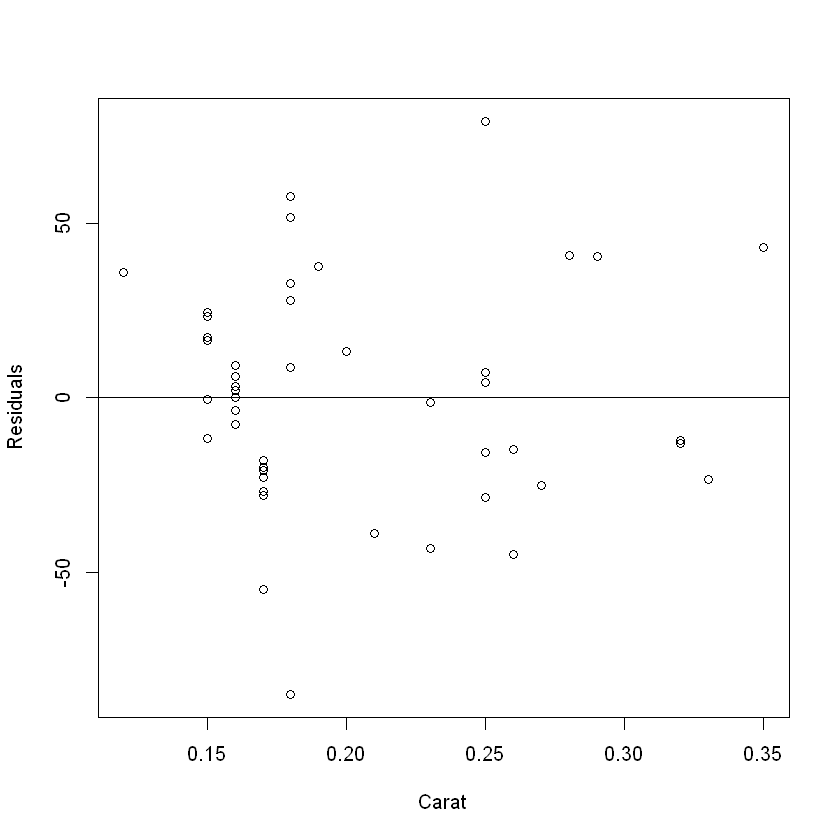

In [68]:
plot(diamond$carat, resid(fit), ylab = "Residuals", xlab = "Carat")
abline(0, 0)

In [76]:
sum_coef <- summary(fit)$coefficient
sum_coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-259.6259,17.31886,-14.99094,2.523271e-19
carat,3721.0249,81.78588,45.49715,6.751260e-40


In [89]:
(sum_coef[2,1] + c(-1,1) * qt(0.975, df = fit$df) * sum_coef[2,2])/10

[1] 355.6398 388.5651

## Draw Ribbon Chart

## Mulitple (Multivariable) Linear Regression

In [90]:
data(mtcars)

In [91]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [92]:
input <- mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,disp,hp,wt
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [103]:
summary(lm(mpg ~ disp, data = input))$r.squared

[1] 0.7183433

In [104]:
summary(lm(mpg ~ hp, data = input))$r.squared

[1] 0.6024373

In [105]:
summary(lm(mpg ~ wt, data = input))$r.squared

[1] 0.7528328

In [106]:
model <- lm(mpg ~ disp + hp + wt, data = input)
model


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  


In [107]:
summary(model)$r.squared

[1] 0.8268361

## ANOVA

In [113]:
model1 <- lm(mpg ~ disp, data = input)
model2 <- lm(mpg ~ disp + hp, data = input)
model3 <- lm(mpg ~ disp + hp + wt, data = input)
anova(model1, model2, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,317.1587,NA,NA,NA,NA
29,283.4934,1,33.66525,4.834216,0.036328627
28,194.9907,1,88.50276,12.708696,0.001330991


In [123]:
input <- mtcars[, c("mpg", "disp", "hp", "wt", "cyl")]
head(input)

,mpg,disp,hp,wt,cyl
Mazda RX4,21.0,160,110,2.620,6
Mazda RX4 Wag,21.0,160,110,2.875,6
Datsun 710,22.8,108,93,2.320,4
Hornet 4 Drive,21.4,258,110,3.215,6
Hornet Sportabout,18.7,360,175,3.440,8
Valiant,18.1,225,105,3.460,6


In [125]:
summary(lm(mpg ~ disp + hp + wt + cyl, data = input))$r.squared

[1] 0.8486348

In [126]:
model1 <- lm(mpg ~ disp + hp + wt, data = input)
model2 <- lm(mpg ~ disp + hp + wt + cyl, data = input)
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,194.9907,NA,NA,NA,NA
27,170.4444,1,24.54631,3.888368,0.05894681
